In [25]:

import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score, roc_curve, average_precision_score, f1_score, accuracy_score, balanced_accuracy_score
import matplotlib.pyplot as plt
import numpy as np


#pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
pd.set_option('max_colwidth', 200)
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


def df_stats(df):
    from tabulate import tabulate
    print("\n***** Shape: ", df.shape," *****\n")
    
    columns_list = df.columns.values.tolist()
    isnull_list = df.isnull().sum().values.tolist()
    isunique_list = df.nunique().values.tolist()
    dtypes_list = df.dtypes.tolist()
    
    list_stat_val = list(zip(columns_list, isnull_list, isunique_list, dtypes_list))
    df_stat_val = pd.DataFrame(list_stat_val, columns=['Name', 'Null', 'Unique', 'Dtypes'])
    print(tabulate(df_stat_val, headers='keys', tablefmt='psql'))
    return df.head()

In [2]:
import os
import sys

## CHANGE THIS
dir2 = os.path.abspath("/volume/deepecg/DeepECG_Preprocess/utils")
dir1 = os.path.dirname(dir2)
if dir1 not in sys.path:
    sys.path.append(dir1)
import importlib

# Check if the utils module exists
utils_spec = importlib.util.find_spec("utils")
if utils_spec is None:
    raise ImportError("The 'utils' module could not be found.")
#utils = importlib.util.module_from_spec(utils_spec)
#utils_spec.loader.exec_module(utils)

# Import the plot_from_parquet function from the utils module
from utils import ecg_plotter
# Set matplotlib background to white
import matplotlib as mpl
mpl.rcParams['figure.facecolor'] = 'white'
mpl.rcParams['axes.facecolor'] = 'white'


In [3]:
#mimic_all = pd.read_csv("/media/data1/ravram/MIMIC-IV/mimic_index.corrected.csv")
#mimic_all.rename(columns={'waveform_path': 'npy_path', 'report': 'diagnosis'}, inplace=True)
X_CLSA = np.load('/media/data1/anolin/for_achille_ssl/CLSA/X_combined_CLSA_CLEANED.npy')
X_MHI = 0.00488*np.load('/media/data1/muse_ge/X_test_v1.2.npy')
X_MIMIC = np.load('/media/data1/anolin/for_achille_ssl/NEW_DS/MIMIC_cleaned/X_MIMIC_cleaned.npy')
X_PTB = np.load('/media/data1/anolin/for_achille_ssl/NEW_DS/PTB_cleaned/X_PTB_cleaned.npy')
#X_CLSA = np.load('/media/data1/anolin/for_achille_ssl/CLSA/X_combined_CLSA_CLEANED.npy')
X_UKB = np.load('/media/data1/anolin/for_achille_ssl/NEW_DS/UKB_cleaned_high_pass_scaled/X_UKB_cleaned_high_pass_scaled.npy')


In [23]:
Y_CLSA = np.load('/media/data1/anolin/for_achille_ssl/CLSA/Y_combined_CLSA_CLEANED.npy')
Y_MHI = 0.00488*np.load('/media/data1/muse_ge/Y_test_v1.2.npy')
Y_MIMIC = np.load('/media/data1/anolin/for_achille_ssl/NEW_DS/MIMIC_cleaned/Y_MIMIC.npy')
Y_PTB = np.load('/media/data1/anolin/for_achille_ssl/NEW_DS/PTB_cleaned/Y_PTB.npy')
Y_UKB = np.load('/media/data1/anolin/for_achille_ssl/NEW_DS/UKB_cleaned_high_pass_scaled/Y_UKB.npy')

48 30 0.00488


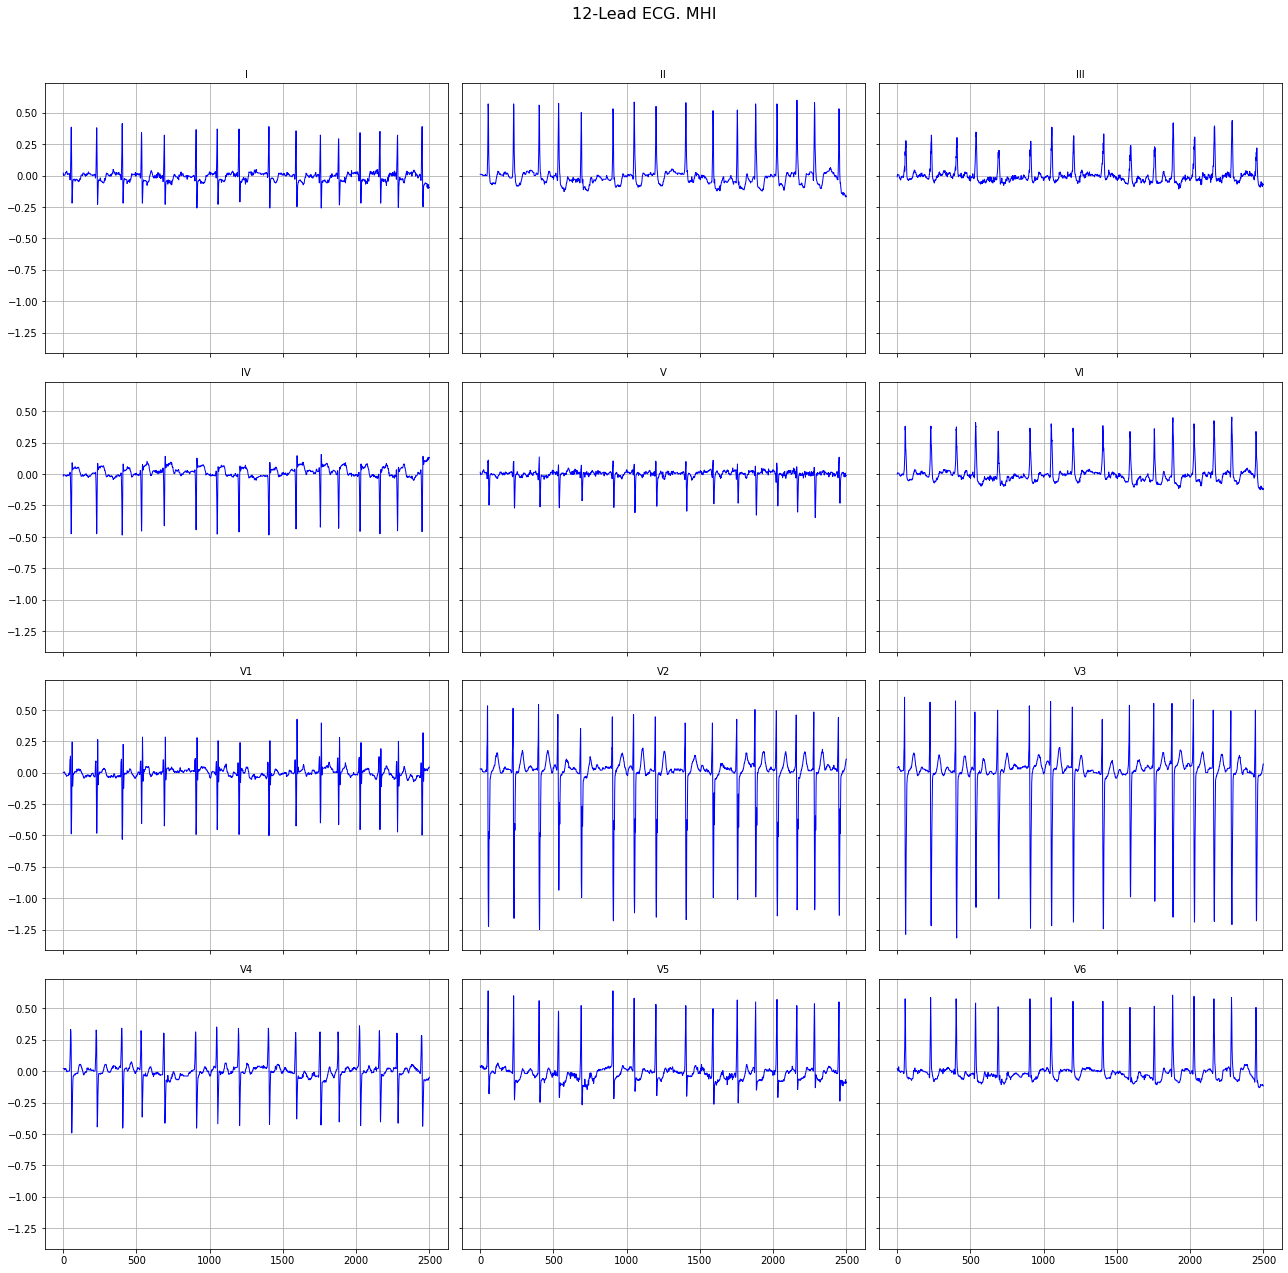

(12, 2500)


In [33]:
ds_type = 'MHI'
y_idx = [35, 3, 10, 58, 33, 57, 45, 39, 19, 29, 63, 36, 15, 24, 56, 0, 2, 44, 55, 68, 73, 18, 34, 1, 27, 53, 31, 60, 46, 11, 12, 59, 50, 42, 14, 76, 9, 22, 25, 8, 32, 7, 20, 64, 48, 52, 26, 67, 71, \
28, 23, 65, 66, 70, 75, 16, 17, 4, 41, 74, 72, 49, 62, 5, 38, 13, 30, 61, 69, 47, 43, 21, 51, 6, 37, 54, 40]
if ds_type == 'MHI':
    X, Y = X_MHI, Y_MHI
    y_idx = [35, 3, 10, 64, 33, 63, 46, 40, 19, 29, 70, 36, 15, 24, 62, 0, 2, 45, 61, 80, 86, 18, 34, 1, 27, 57, 31, 66, 47, 11, 12, 65, 54, 43, 14, 91, 9, 22, 25, 8, 32, 7, 20, 72, 49, 56, 26, 75, 84, 28, 23, 73, 74, 83, 89, 16, 17, 4, 42, 88, 85, 51, 69, 5, 38, 13, 30, 67, 82, 48, 44, 21, 55, 6, 37, 58, 41]
elif ds_type == 'MIMIC':
    X, Y = X_MIMIC, Y_MIMIC
elif ds_type == 'UKB':
    X, Y = X_UKB, Y_UKB
elif ds_type == 'PTB':
    X, Y = X_PTB, Y_PTB
elif ds_type == 'CLSA':
    X, Y = X_CLSA, Y_CLSA

y_labels =  ['Acute pericarditis', 'QS complex in V1-V2-V3', 'T wave inversion (anterior - V3-V4)', 'Right atrial enlargement','2nd degree AV block - mobitz 1','Left posterior fascicular block','Wolff-Parkinson-White (Pre-excitation syndrome)','Junctional rhythm','Premature ventricular complex',"rSR' in V1-V2",'Right superior axis','ST elevation (inferior - II, III, aVF)','Afib','ST elevation (anterior - V3-V4)','RV1 + SV6 > 11 mm','Sinusal','Monomorph','Delta wave','R/S ratio in V1-V2 >1','Third Degree AV Block','LV pacing','Nonspecific intraventricular conduction delay','ST depression (inferior - II, III, aVF)','Regular','Premature atrial complex','2nd degree AV block - mobitz 2','Left anterior fascicular block','Q wave (septal- V1-V2)','Prolonged QT','Left axis deviation','Left ventricular hypertrophy','ST depression (septal- V1-V2)','Supraventricular tachycardia','Atrial paced','Q wave (inferior - II, III, aVF)','no_qrs','T wave inversion (lateral -I, aVL, V5-V6)','Right bundle branch block','ST elevation (septal - V1-V2)','SV1 + RV5 or RV6 > 35 mm','Right axis deviation','RaVL > 11 mm','Polymorph','Ventricular tachycardia','QRS complex negative in III','ST depression (lateral - I, avL, V5-V6)','1st degree AV block','Lead misplacement','Q wave (posterior - V7-V9)','Atrial flutter','Ventricular paced','ST elevation (posterior - V7-V8-V9)','Ectopic atrial rhythm (< 100 BPM)','Early repolarization','Ventricular Rhythm','Irregularly irregular','Atrial tachycardia (>= 100 BPM)','R complex in V5-V6','ST elevation (lateral - I, aVL, V5-V6)','Brugada','Bi-atrial enlargement','Q wave (lateral- I, aVL, V5-V6)','ST upslopping','T wave inversion (inferior - II, III, aVF)','Regularly irregular','Bradycardia','qRS in V5-V6-I, aVL','Q wave (anterior - V3-V4)','Acute MI','ST depression (anterior - V3-V4)','Right ventricular hypertrophy','T wave inversion (septal- V1-V2)','ST downslopping','Left bundle branch block','Low voltage','U wave','Left atrial enlargement']
#sl_y_labels = ['Sinusal','Regular','Monomorph','QS complex in V1-V2-V3','R complex in V5-V6','T wave inversion (inferior - II, III, aVF)','Left bundle branch block','RaVL > 11 mm','SV1 + RV5 or RV6 > 35 mm','T wave inversion (lateral -I, aVL, V5-V6)','T wave inversion (anterior - V3-V4)','Left axis deviation','Left ventricular hypertrophy','Bradycardia','Q wave (inferior - II, III, aVF)','Afib','Irregularly irregular','Atrial tachycardia (>= 100 BPM)','Nonspecific intraventricular conduction delay','Premature ventricular complex','Polymorph','T wave inversion (septal- V1-V2)','Right bundle branch block','Ventricular paced','ST elevation (anterior - V3-V4)','ST elevation (septal - V1-V2)','1st degree AV block','Premature atrial complex','Atrial flutter',"rSR' in V1-V2",'qRS in V5-V6-I, aVL','Left anterior fascicular block','Right axis deviation','2nd degree AV block - mobitz 1','ST depression (inferior - II, III, aVF)','Acute pericarditis','ST elevation (inferior - II, III, aVF)','Low voltage','Regularly irregular','Junctional rhythm','Left atrial enlargement','ST elevation (lateral - I, aVL, V5-V6)','Atrial paced','Right ventricular hypertrophy','Delta wave','Wolff-Parkinson-White (Pre-excitation syndrome)','Prolonged QT','ST depression (anterior - V3-V4)','QRS complex negative in III','Q wave (lateral- I, aVL, V5-V6)','Supraventricular tachycardia','ST downslopping','ST depression (lateral - I, avL, V5-V6)','2nd degree AV block - mobitz 2','U wave','R/S ratio in V1-V2 >1','RV1 + SV6 > 11 mm','Left posterior fascicular block','Right atrial enlargement','ST depression (septal- V1-V2)','Q wave (septal- V1-V2)','Q wave (anterior - V3-V4)','ST upslopping','Right superior axis','Ventricular tachycardia','ST elevation (posterior - V7-V8-V9)','Ectopic atrial rhythm (< 100 BPM)','Lead misplacement','Third Degree AV Block','Acute MI','Early repolarization','Q wave (posterior - V7-V9)','Bi-atrial enlargement','LV pacing','Brugada','Ventricular Rhythm','no_qrs']

label = 'Left ventricular hypertrophy'
idx = y_labels.index(label)
Y = Y[:, y_idx]
midx = np.argmax(Y[:, idx])

print(midx, idx, Y[midx, idx])

# Generate synthetic ECG data for demonstration (replace this with your actual data)
# Assume each lead has 500 sample points
leads = ['I', 'II', 'III', 'IV', 'V', 'VI', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6']
#leads = [f'Lead {i+1}' for i in range(12)]
ecg_data = X[midx].T #[np.sin(0.02 * np.pi * np.arange(500) + i) for i in range(12)]  # Replace with real ECG data

# Create a 3x4 subplot grid
fig, axes = plt.subplots(4, 3, figsize=(18, 18), sharex=True, sharey=True)

# Plot each lead in its subplot
for i, ax in enumerate(axes.flat):
    ax.plot(ecg_data[i], color='blue', linewidth=1)
    ax.set_title(leads[i], fontsize=10)
    ax.grid(True)

# Set overall plot aesthetics
fig.suptitle(f"12-Lead ECG. {ds_type}", fontsize=16)
fig.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the title
plt.show()
print(ecg_data.shape)


In [4]:
list_clean_labels = ['Sinusal','Regular','Monomorph','QS complex in V1-V2-V3','R complex in V5-V6','T wave inversion (inferior - II, III, aVF)','Left bundle branch block','RaVL > 11 mm','SV1 + RV5 or RV6 > 35 mm','T wave inversion (lateral -I, aVL, V5-V6)','T wave inversion (anterior - V3-V4)','Left axis deviation','Left ventricular hypertrophy','Bradycardia','Q wave (inferior - II, III, aVF)','Afib','Irregularly irregular','Atrial tachycardia (>= 100 BPM)','Nonspecific intraventricular conduction delay','Premature ventricular complex','Polymorph','T wave inversion (septal- V1-V2)','Right bundle branch block','Ventricular paced','ST elevation (anterior - V3-V4)','ST elevation (septal - V1-V2)','1st degree AV block','Premature atrial complex','Atrial flutter',"rSR' in V1-V2",'qRS in V5-V6-I, aVL','Left anterior fascicular block','Right axis deviation','2nd degree AV block - mobitz 1','ST depression (inferior - II, III, aVF)','Acute pericarditis','ST elevation (inferior - II, III, aVF)','Low voltage','Regularly irregular','Bifid','Junctional rhythm','Left atrial enlargement','ST elevation (lateral - I, aVL, V5-V6)','Atrial paced','Right ventricular hypertrophy','Delta wave','Wolff-Parkinson-White (Pre-excitation syndrome)','Prolonged QT','ST depression (anterior - V3-V4)','QRS complex negative in III','RaVL + SV3 > 28 mm (H) or 20 mm (F)','Q wave (lateral- I, aVL, V5-V6)','Hyperacute T wave (lateral, V5-V6)','Hyperacute T wave (septal, V1-V2)','Supraventricular tachycardia','ST downslopping','ST depression (lateral - I, avL, V5-V6)','2nd degree AV block - mobitz 2','U wave','ST depression et T inversion in V5 or V6','Large >0.08 s','R/S ratio in V1-V2 >1','RV1 + SV6 > 11 mm','Left posterior fascicular block','Right atrial enlargement','ST depression (septal- V1-V2)','Q wave (septal- V1-V2)','Q wave (anterior - V3-V4)','Hyperacute T wave (anterior, V3-V4)','ST upslopping','Right superior axis','Auricular bigeminy','Ventricular tachycardia','ST elevation (posterior - V7-V8-V9)','Ectopic atrial rhythm (< 100 BPM)','Lead misplacement','Biphasic','Ventricular bigeminy','J wave','Tall >2.5 mm','Third Degree AV Block','Sinus Pause','Acute MI','Early repolarization','Q wave (posterior - V7-V9)','Bi-atrial enlargement','LV pacing','Dextrocardia','Brugada','Ventricular Rhythm','ST depression (posterior - V7-V8-V9)','no_qrs']
labels_to_remove = ['ST depression (posterior - V7-V8-V9)','Tall >2.5 mm', 'J wave', 'Auricular bigeminy', 'Ventricular bigeminy', 'Sinus Pause', 'Dextrocardia', 'Hyperacute T wave (lateral, V5-V6)', 'Hyperacute T wave (septal, V1-V2)', 'Hyperacute T wave (anterior, V3-V4)', 'Bifid', 'RaVL + SV3 > 28 mm (H) or 20 mm (F)', 'Large >0.08 s', 'Biphasic', 'ST depression et T inversion in V5 or V6']

pos_to_drop = list()
new_label_names = list()
for pos, item in enumerate(list_clean_labels):
    if item in labels_to_remove:
        pos_to_drop.append(pos)
    else:
        new_label_names.append(item)



In [5]:
y_labels =  ['Acute pericarditis', 'QS complex in V1-V2-V3', 'T wave inversion (anterior - V3-V4)', 'Right atrial enlargement','2nd degree AV block - mobitz 1','Left posterior fascicular block','Wolff-Parkinson-White (Pre-excitation syndrome)','Junctional rhythm','Premature ventricular complex',"rSR' in V1-V2",'Right superior axis','ST elevation (inferior - II, III, aVF)','Afib','ST elevation (anterior - V3-V4)','RV1 + SV6 > 11 mm','Sinusal','Monomorph','Delta wave','R/S ratio in V1-V2 >1','Third Degree AV Block','LV pacing','Nonspecific intraventricular conduction delay','ST depression (inferior - II, III, aVF)','Regular','Premature atrial complex','2nd degree AV block - mobitz 2','Left anterior fascicular block','Q wave (septal- V1-V2)','Prolonged QT','Left axis deviation','Left ventricular hypertrophy','ST depression (septal- V1-V2)','Supraventricular tachycardia','Atrial paced','Q wave (inferior - II, III, aVF)','no_qrs','T wave inversion (lateral -I, aVL, V5-V6)','Right bundle branch block','ST elevation (septal - V1-V2)','SV1 + RV5 or RV6 > 35 mm','Right axis deviation','RaVL > 11 mm','Polymorph','Ventricular tachycardia','QRS complex negative in III','ST depression (lateral - I, avL, V5-V6)','1st degree AV block','Lead misplacement','Q wave (posterior - V7-V9)','Atrial flutter','Ventricular paced','ST elevation (posterior - V7-V8-V9)','Ectopic atrial rhythm (< 100 BPM)','Early repolarization','Ventricular Rhythm','Irregularly irregular','Atrial tachycardia (>= 100 BPM)','R complex in V5-V6','ST elevation (lateral - I, aVL, V5-V6)','Brugada','Bi-atrial enlargement','Q wave (lateral- I, aVL, V5-V6)','ST upslopping','T wave inversion (inferior - II, III, aVF)','Regularly irregular','Bradycardia','qRS in V5-V6-I, aVL','Q wave (anterior - V3-V4)','Acute MI','ST depression (anterior - V3-V4)','Right ventricular hypertrophy','T wave inversion (septal- V1-V2)','ST downslopping','Left bundle branch block','Low voltage','U wave','Left atrial enlargement']
sl_y_labels = ['Sinusal','Regular','Monomorph','QS complex in V1-V2-V3','R complex in V5-V6','T wave inversion (inferior - II, III, aVF)','Left bundle branch block','RaVL > 11 mm','SV1 + RV5 or RV6 > 35 mm','T wave inversion (lateral -I, aVL, V5-V6)','T wave inversion (anterior - V3-V4)','Left axis deviation','Left ventricular hypertrophy','Bradycardia','Q wave (inferior - II, III, aVF)','Afib','Irregularly irregular','Atrial tachycardia (>= 100 BPM)','Nonspecific intraventricular conduction delay','Premature ventricular complex','Polymorph','T wave inversion (septal- V1-V2)','Right bundle branch block','Ventricular paced','ST elevation (anterior - V3-V4)','ST elevation (septal - V1-V2)','1st degree AV block','Premature atrial complex','Atrial flutter',"rSR' in V1-V2",'qRS in V5-V6-I, aVL','Left anterior fascicular block','Right axis deviation','2nd degree AV block - mobitz 1','ST depression (inferior - II, III, aVF)','Acute pericarditis','ST elevation (inferior - II, III, aVF)','Low voltage','Regularly irregular','Junctional rhythm','Left atrial enlargement','ST elevation (lateral - I, aVL, V5-V6)','Atrial paced','Right ventricular hypertrophy','Delta wave','Wolff-Parkinson-White (Pre-excitation syndrome)','Prolonged QT','ST depression (anterior - V3-V4)','QRS complex negative in III','Q wave (lateral- I, aVL, V5-V6)','Supraventricular tachycardia','ST downslopping','ST depression (lateral - I, avL, V5-V6)','2nd degree AV block - mobitz 2','U wave','R/S ratio in V1-V2 >1','RV1 + SV6 > 11 mm','Left posterior fascicular block','Right atrial enlargement','ST depression (septal- V1-V2)','Q wave (septal- V1-V2)','Q wave (anterior - V3-V4)','ST upslopping','Right superior axis','Ventricular tachycardia','ST elevation (posterior - V7-V8-V9)','Ectopic atrial rhythm (< 100 BPM)','Lead misplacement','Third Degree AV Block','Acute MI','Early repolarization','Q wave (posterior - V7-V9)','Bi-atrial enlargement','LV pacing','Brugada','Ventricular Rhythm','no_qrs']

label = 'Left ventricular hypertrophy'

#label = 'Acute pericarditis'

y_labels.index(label), sl_y_labels.index(label)
csv = pd.read_csv('/media/data1/anolin/PTB-XL/combined_metadata_with_conversion_ptb_xl.csv')
csv

csv.loc[101, ['scp_codes_x', 'converted_str_labels']]

#1st degree av block

scp_codes_x                                                                                                             {'ISCAL': 50.0, '1AVB': 100.0, 'SR': 0.0}
converted_str_labels    [('1st degree AV block', 100.0), ('Regular', 100.0), ('Sinusal', 100.0), ('Monomorph', 100.0), ('2nd degree AV block - mobitz 1', 100.0)]
Name: 101, dtype: object

In [6]:
csv = pd.read_csv('/media/data1/anolin/PTB-XL/combined_metadata_with_conversion_ptb_xl.csv')


#sl_y_pred = np.load('/media/data1/anolin/for_achille_ssl/NEW_DS/PTB_cleaned/SL_logits.npy')
#sl_y_true = np.load('/media/data1/anolin/for_achille_ssl/NEW_DS/PTB_cleaned/Y_PTB.npy')
#sl_y_true = np.load('/media/data1/anolin/for_achille_ssl/logits/CLSA_77_labels/Y_CLSA_bert.npy')
sl_y_true = np.load('/media/data1/anolin/for_achille_ssl/CLSA/Y_combined_CLSA_CLEANED.npy')
sl_y_pred = np.load('/media/data1/anolin/for_achille_ssl/logits/CLSA_77_labels/logit.npy')


y_idx = [35, 3, 10, 58, 33, 57, 45, 39, 19, 29, 63, 36, 15, 24, 56, 0, 2, 44, 55, 68, 73, 18, 34, 1, 27, 53, 31, 60, 46, 11, 12, 59, 50, 42, 14, 76, 9, 22, 25, 8, 32, 7, 20, 64, 48, 52, 26, 67, 71, \
28, 23, 65, 66, 70, 75, 16, 17, 4, 41, 74, 72, 49, 62, 5, 38, 13, 30, 61, 69, 47, 43, 21, 51, 6, 37, 54, 40]

#sl_y_idx = [15, 23, 16, 1, 57, 63, 73, 41, 39, 36, 2, 29, 30, 65, 34, 12, 55, 56, 21, 8, 42, 71, 37, 50, 13, 38, 46, 24, 49, 9, 66, 26, 40, 4, 22, 0, 11, 74, 64, 7, 76, 58, 33, 70, 17, 6, 28, 69, 44, 61, 32, 72, 45, 25, 75, 18, 14, 5, 3, 31, 27, 67, 62, 10, 43, 51, 52, 47, 19, 68, 53, 48, 60, 20, 59, 54, 35]

ssl_y_true = sl_y_true[:, y_idx]

#sl_y_pred = sl_y_pred[:, y_idx]
header_pkl = '/media/data1/achilsowa/results/fairseq/outputs/2024-10-08/04-39-01/checkpoint_last-ft-labels-77-bce/outputs_clsa_cleaned_header.pkl'
header_npy = '/media/data1/achilsowa/results/fairseq/outputs/2024-10-08/04-39-01/checkpoint_last-ft-labels-77-bce/outputs_clsa_cleaned.npy'
header = np.load(header_pkl, allow_pickle=True)
ssl_y_pred = np.memmap(header_npy, 
    mode='r',
    shape=header['shape'],
    dtype=header['dtype']
)
ssl_label_id = y_labels.index(label)
sl_label_id = sl_y_labels.index(label)

print(sl_y_true.shape, ssl_y_pred.shape, sl_y_pred.shape)
ssl_l_true = ssl_y_true[:, ssl_label_id]
ssl_l_pred = ssl_y_pred[:, ssl_label_id]

sl_l_true = sl_y_true[:, sl_label_id]
sl_l_pred = sl_y_pred[:, sl_label_id]

mask = ((ssl_l_true == 1) & (sl_l_pred > 0) & (ssl_l_pred < 0)).astype(int)


mask
np.argmax(mask[18:])
mask[72]
#roc_auc_score(ssl_l_true, ssl_l_pred), roc_auc_score(sl_l_true, sl_l_pred)
#random_index = np.random.choice(indices_where_one = np.where(maskbinary_array == 1)[0]) 

(54641, 77) (54612, 77) (54641, 77)


ValueError: operands could not be broadcast together with shapes (54641,) (54612,) 

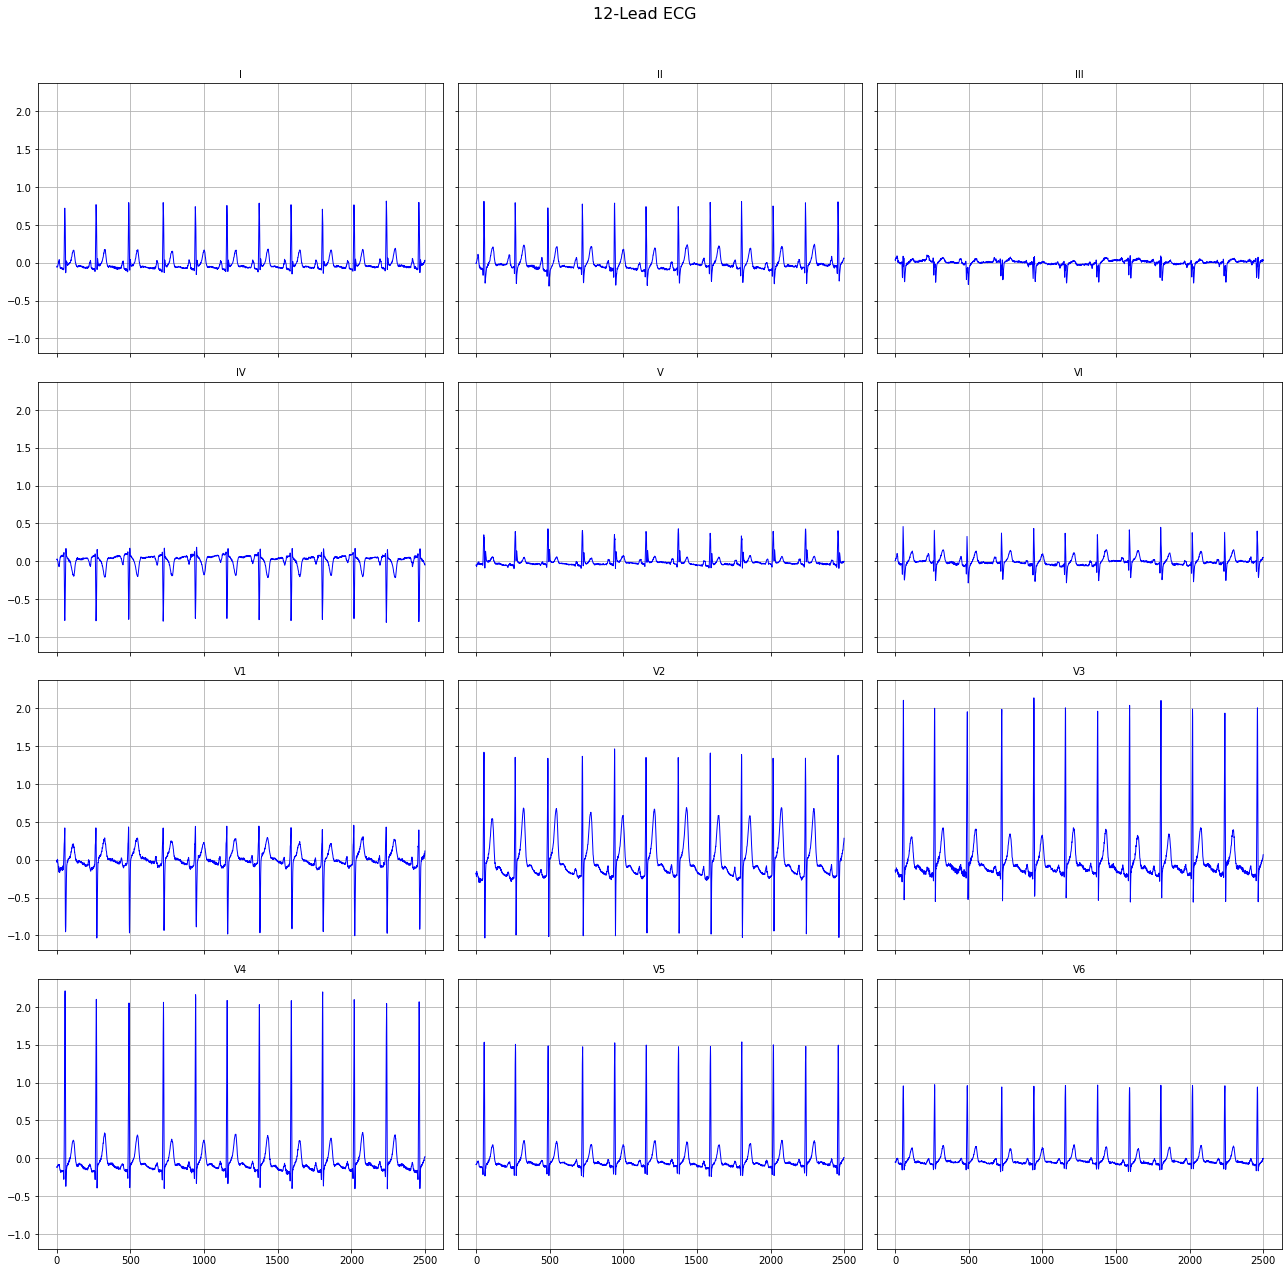

(12, 2500)


In [33]:
54+18

72

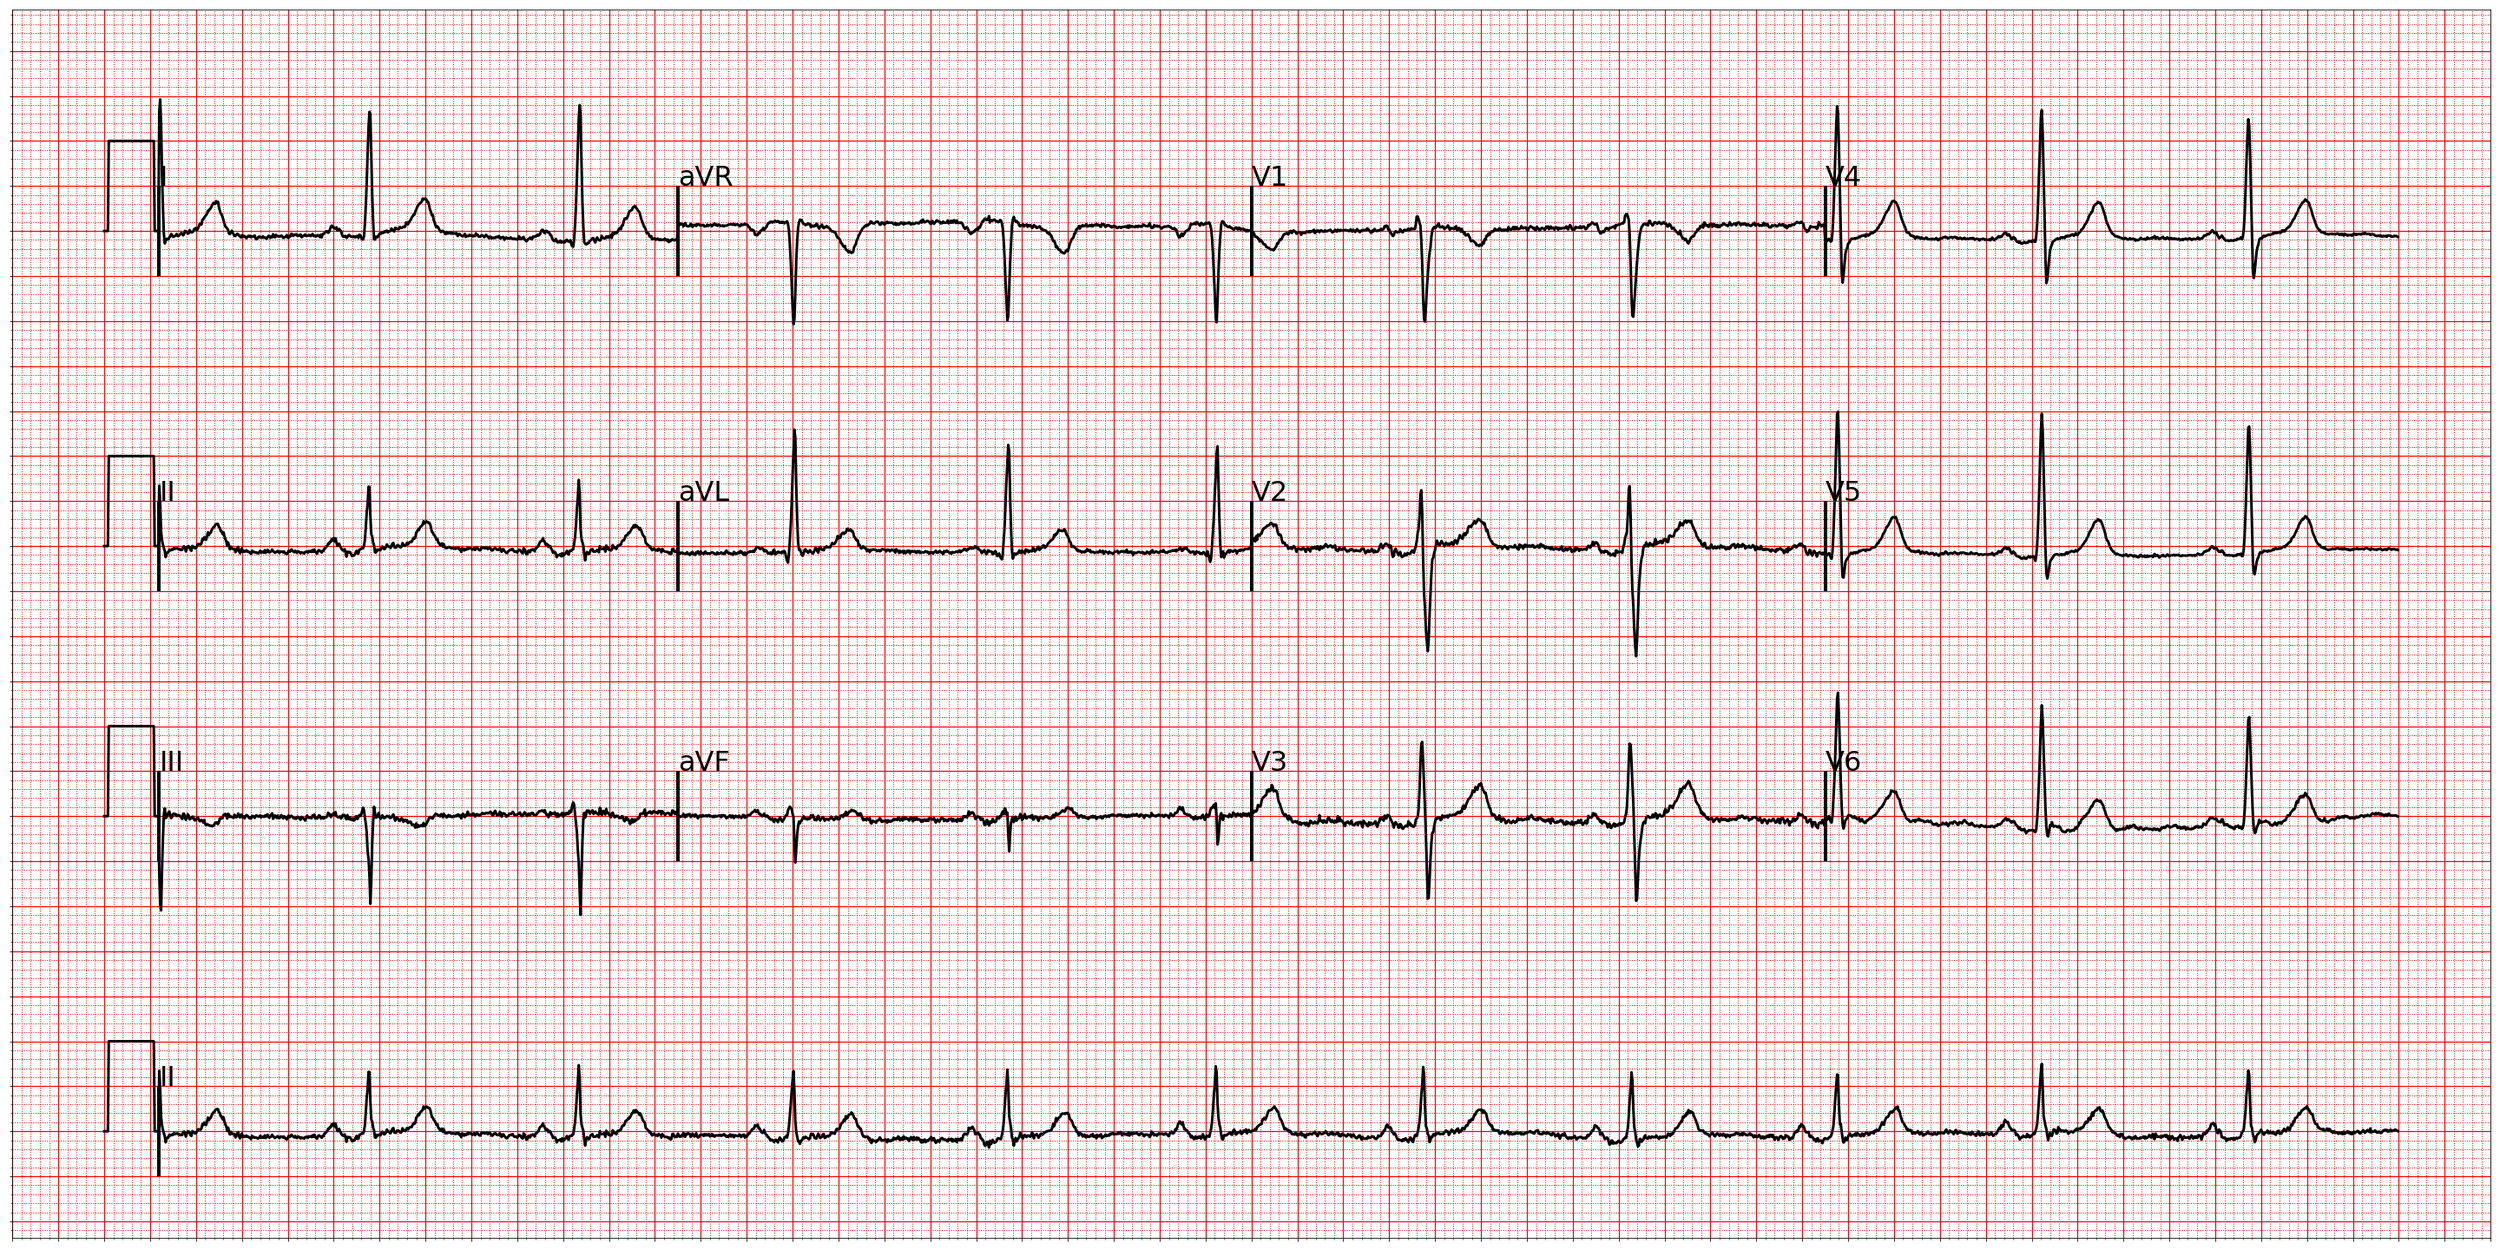

In [34]:
def plot_ecg(npy_array):
    plotter = ecg_plotter.create_ecg_plotter(
        "npy",
        source_path='fake.npy',
        dataset='MHI',
        npy_array=npy_array*(1000/4.88),
    )
    plotter.plot_ecg(save=False, anonymize=True, show_diagnosis=False)


#plot_ecg(X_PTB[101]/(0.00488))
# 1ms/1mv
plot_ecg(X_CLSA[72])

In [22]:
f1 = pd.read_parquet('/media/data1/datasets/CLSA/2401002_MontrealHeartInstitute_ECG_RAW_F1/final_data_bert_F1.parquet')
bl = pd.read_parquet('/media/data1/datasets/CLSA/2401002_MontrealHeartInstitute_ECG_RAW_BL/final_data_bert_BL.parquet')
len(f1)+len(bl)

54758

In [36]:
bl.loc[72, ['DIAGNOSIS']]

DIAGNOSIS    *** Poor data quality, interpretation may be adversely    affected Sinus bradycardia Nonspecific ST and T wave abnormality Abnormal ECG
Name: 72, dtype: object